In [91]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [106]:
# Load the MNIST data from the downloaded file
data = np.load('mnist.npz')

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8)

# Access training and testing set dimensions
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


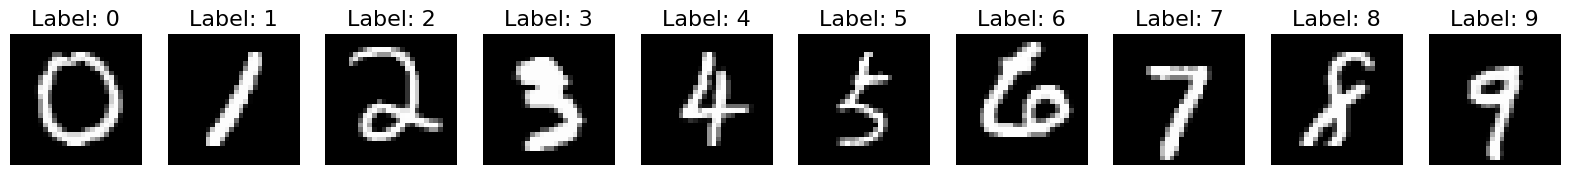

In [93]:
# Display each class (numbers 0 to 9)
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)
    ax[i].axis('off')

In [94]:
# Change the y training and testing values into classes instead of numbers
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\nCategorical y_train:')
for i in range(10):
  print(y_train[i])


Categorical y_train:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [96]:
# Normalize the data to a range between 0 and 1 (Originally RGB between 0 and 255)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(48000, 784)


In [97]:
# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

In [98]:
# Create a model for each unique number of epochs to find the most optimal setting
for epochs in range(1, 11):
    model = Sequential()
    model.add(Dense(units=128, input_shape=(784,), activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    trained = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_test, y_test))

    # History is a dictionary containing all the metrics monitored during training and validation
    train_accuracies.append(trained.history['accuracy'][-1])
    test_accuracies.append(trained.history['val_accuracy'][-1])

1500/1500 [==============================] - 2s 978us/step - loss: 0.2930 - accuracy: 0.9116 - val_loss: 0.1515 - val_accuracy: 0.9553
Epoch 1/2
1500/1500 [==============================] - 2s 995us/step - loss: 0.2960 - accuracy: 0.9117 - val_loss: 0.1487 - val_accuracy: 0.9548
Epoch 2/2
1500/1500 [==============================] - 1s 916us/step - loss: 0.1253 - accuracy: 0.9631 - val_loss: 0.1138 - val_accuracy: 0.9658
Epoch 1/3
1500/1500 [==============================] - 2s 969us/step - loss: 0.2911 - accuracy: 0.9136 - val_loss: 0.1520 - val_accuracy: 0.9544
Epoch 2/3
1500/1500 [==============================] - 1s 917us/step - loss: 0.1236 - accuracy: 0.9627 - val_loss: 0.1056 - val_accuracy: 0.9670
Epoch 3/3
1500/1500 [==============================] - 1s 919us/step - loss: 0.0859 - accuracy: 0.9738 - val_loss: 0.0947 - val_accuracy: 0.9721
Epoch 1/4
1500/1500 [==============================] - 2s 967us/step - loss: 0.2925 - accuracy: 0.9125 - val_loss: 0.1651 - val_accuracy: 0.

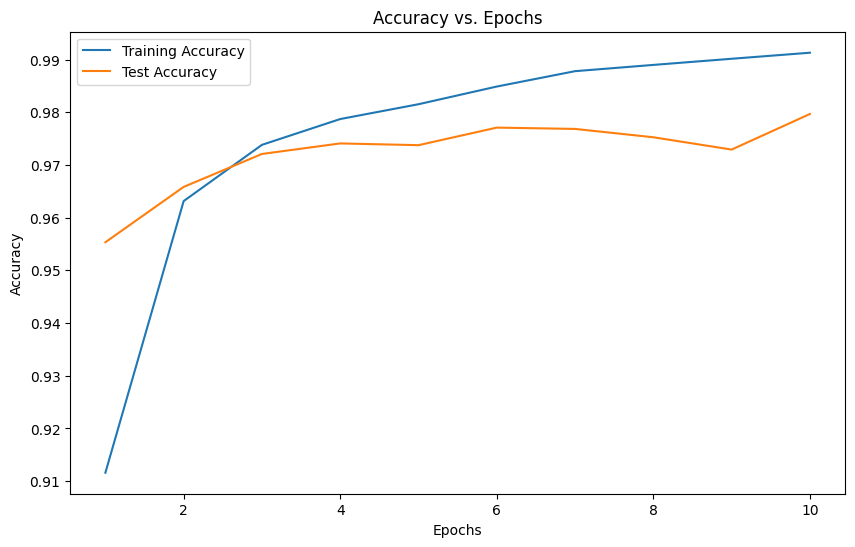

In [100]:
# Plot training and test accuracy vs. number of epochs
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), train_accuracies, label='Training Accuracy')
plt.plot(np.arange(1, 11), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

In [101]:
# Create a sequential model
model = Sequential()

# Add 3 layers - 1 input, 1 hidden, and 1 output
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 128)               100480    
                                                                 
 dense_184 (Dense)           (None, 128)               16512     
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 dense_185 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
# Train the model with the most optimal epoch value found in the above graph
epochs=10
model.fit(x=x_train, y=y_train, epochs=epochs)

Epoch 1/10
1500/1500 [==============================] - 1s 825us/step - loss: 0.2857 - accuracy: 0.9155
Epoch 2/10
1500/1500 [==============================] - 1s 815us/step - loss: 0.1252 - accuracy: 0.9628
Epoch 3/10
1500/1500 [==============================] - 1s 820us/step - loss: 0.0864 - accuracy: 0.9737
Epoch 4/10
1500/1500 [==============================] - 1s 821us/step - loss: 0.0681 - accuracy: 0.9784
Epoch 5/10
1500/1500 [==============================] - 1s 839us/step - loss: 0.0533 - accuracy: 0.9828
Epoch 6/10
1500/1500 [==============================] - 1s 814us/step - loss: 0.0448 - accuracy: 0.9857
Epoch 7/10
1500/1500 [==============================] - 1s 814us/step - loss: 0.0392 - accuracy: 0.9872
Epoch 8/10
1500/1500 [==============================] - 1s 819us/step - loss: 0.0334 - accuracy: 0.9889
Epoch 9/10
1500/1500 [==============================] - 1s 813us/step - loss: 0.0286 - accuracy: 0.9902
Epoch 10/10
1500/1500 [==============================] - 1s 814u

In [103]:
# Get full predictions on each test case
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 [==============================] - 0s 432us/step


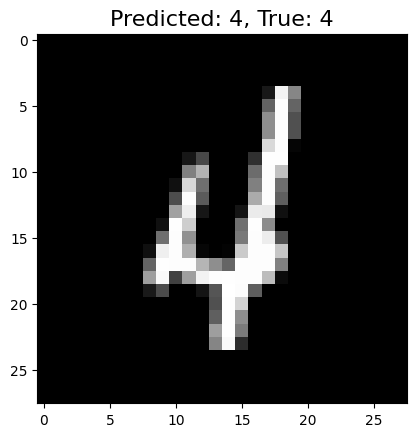

In [104]:
# Displays a single test case
rand_index = np.random.choice(len(x_test))
x_sample = x_test[rand_index]

# Converts the encoded labels into their corresponding class indices
y_true = np.argmax(y_test, axis=1)
y_sample = y_true[rand_index]
y_sample_pred_class = y_pred_classes[rand_index]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

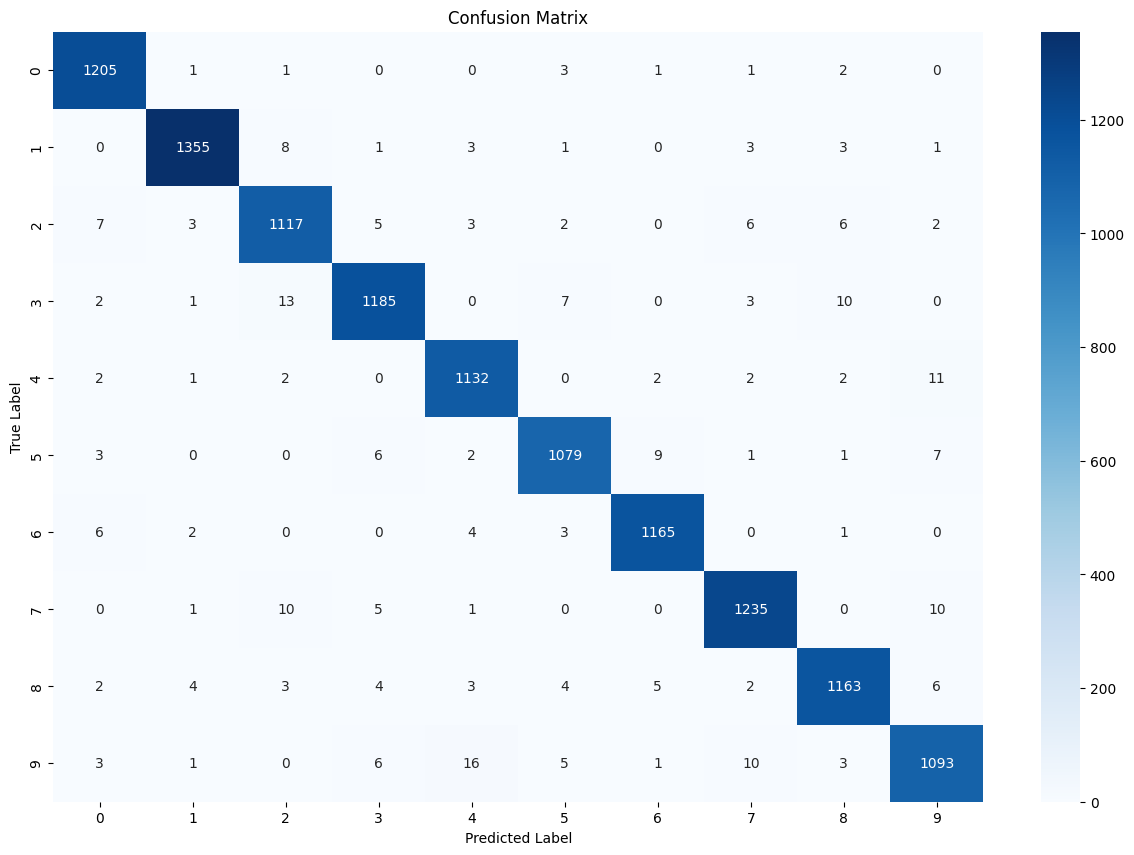

In [105]:
# Create and display the model's confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');